***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [88]:
import pandas as pd

In [90]:
df = pd.read_csv('dados.csv')

In [92]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [94]:
sorted(df["Anos de Estudo"].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [ ]:
sorted(df["UF"].unique())

In [97]:
sorted(df["Sexo"].unique())

[0, 1]

In [98]:
sorted(df["Cor"].unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [99]:
print(f'De {df["Idade"].min()} até {df["Idade"].max()}')

De 13 até 99


#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [100]:
print(f'De {df["Altura"].min()} até {df["Altura"].max()}')

De 1.339244614 até 2.028496765


### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [101]:
df["Sexo"].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [102]:
df["Sexo"].value_counts(normalize=True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [103]:
frequencia = df['Sexo'].value_counts()

In [104]:
percentual = df['Sexo'].value_counts(normalize=True) * 100

In [105]:
dist_freq_qualitativas = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas

,Frequencia,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [106]:
dist_freq_qualitativas.rename(index={0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_qualitativas.rename_axis('Sexo', axis='columns', inplace=True)
dist_freq_qualitativas

Sexo,Frequencia,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [107]:
sexo = {0:'Masculino', 1: 'Feminino'}
cor = {0: 'indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'}

In [108]:
frequencia = pd.crosstab(df['Sexo'], df['Cor'])
frequencia.rename(index=sexo, columns=cor, inplace=True)

In [109]:
frequencia

Cor,indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [110]:
percentual = pd.crosstab(df['Sexo'], df['Cor'], normalize=True) * 100
percentual.rename(index=sexo, columns=cor, inplace=True)

In [111]:
percentual

Cor,indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [112]:
percentual = pd.crosstab(index = df['Sexo'], columns = df['Cor'], aggfunc='mean', values=df['Renda'])
percentual.rename(index=sexo, columns=cor, inplace=True)
percentual

Cor,indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [113]:
vmin, vmax = df['Renda'].min(), df['Renda'].max()

In [114]:
classes = [vmin, 1576, 3152, 7880, 15760, vmax]
labels = ['E', 'D', 'C', 'B', 'A']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [115]:
df['Renda'].head()

0     800
1    1150
2     880
3    3500
4     150
Name: Renda, dtype: int64

In [116]:
frequencia = pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True).value_counts()
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [117]:
percentual = pd.cut(x=df['Renda'], bins=classes, labels=labels, include_lowest=True).value_counts(normalize=True) * 100

In [118]:
dist_freq_quantitativas = pd.DataFrame(data={'Frequência': frequencia, 'Percentual (%)': percentual})
dist_freq_quantitativas

,Frequência,Percentual (%)
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [119]:
dist_freq_quantitativas.sort_index(ascending=False, inplace=True)
dist_freq_quantitativas.rename_axis('Faixa de Salários', axis='columns', inplace=True)
dist_freq_quantitativas

Faixa de Salários,Frequência,Percentual (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [120]:
import numpy as np

In [121]:
k = lambda n: int(1 + (10/3) * np.log10(n))

In [122]:
k(df['Renda'].shape[0])

17

### Passo 2 - Criar a tabela de frequências

In [123]:
values = pd.cut(x = df['Renda'], 
                    bins=k(df.shape[0]),
                    include_lowest=True)

frequencia = pd.value_counts(values,
                sort=False)

percentual = pd.value_counts(values,
                sort=False,
                normalize=True) * 100

In [124]:
dist_freq_quantitativas = pd.DataFrame(data={'Frequência': frequencia, 'Percentual (%)': percentual})

In [125]:
dist_freq_quantitativas.sort_index(ascending=False, inplace=True)
dist_freq_quantitativas.rename_axis('Faixa de Salários', axis='columns', inplace=True)
dist_freq_quantitativas

Faixa de Salários,Frequência,Percentual (%)
"(188235.294, 200000.0]",3,0.003904
"(176470.588, 188235.294]",0,0.000000
"(164705.882, 176470.588]",0,0.000000
"(152941.176, 164705.882]",0,0.000000
"(141176.471, 152941.176]",0,0.000000
"(129411.765, 141176.471]",0,0.000000
"(117647.059, 129411.765]",1,0.001301
"(105882.353, 117647.059]",0,0.000000
"(94117.647, 105882.353]",6,0.007808
"(82352.941, 94117.647]",1,0.001301


## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

### Importando a biblioteca

https://seaborn.pydata.org/

In [126]:
import seaborn as sns

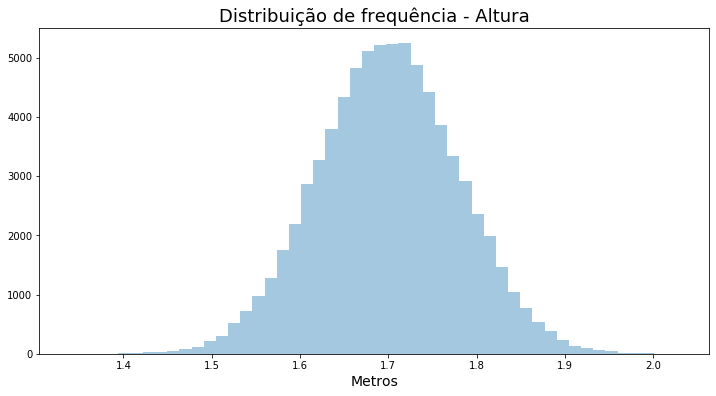

In [127]:
ax = sns.distplot(df["Altura"], kde=False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

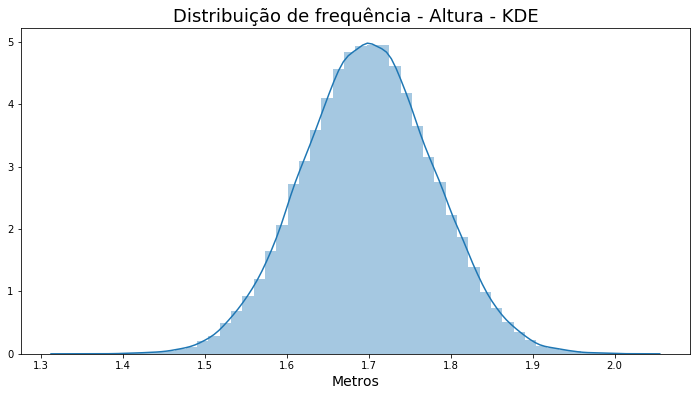

In [128]:
ax = sns.distplot(df["Altura"])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

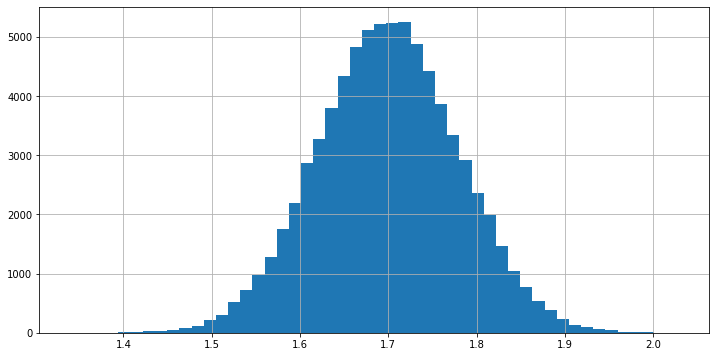

In [129]:
df['Altura'].hist(bins=50, figsize=(12,6))

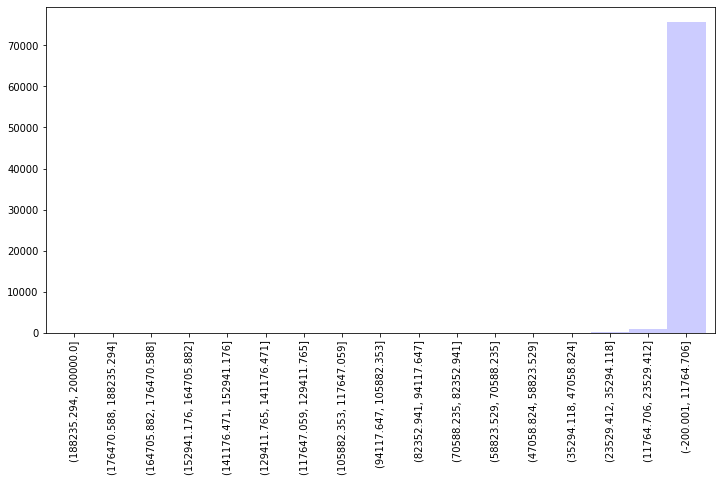

In [130]:
dist_freq_quantitativas['Frequência'].plot.bar(width=1, color='blue', alpha=0.2, figsize=(12,6))

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

## DataFrame de exemplo

In [131]:
df_c =  pd.DataFrame(data={'Fulano': [8,10,4,8,6,10,8],'Beltrano': [10,2,0.5,1,3,9.5,10],
'Sicrano': [7.5,8,7,8,8,8.5,7]}, index=['Matemática', 'Português', 'Inglês', 'Geografia', 'História', 'Física', 'Química'])

df_c.rename_axis('Materias', axis='columns', inplace=True)
df_c

Materias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [132]:
notas = [8,10,4,8,6,10,8]
quantidade_notas = len(notas)
sum(notas) / quantidade_notas

7.714285714285714

In [135]:
df_c['Fulano'].mean()

7.714285714285714

In [137]:
df['Renda'].mean()

2000.3831988547631

In [138]:
df.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [144]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
print(f'Idade média: {dataset.mean()}')
dataset.groupby(['Sexo'])['Idade'].mean()

# ou

dataset.groupby(['Sexo']).mean().loc['H']

Idade média: Idade    46.1
dtype: float64


Idade    45.75
Name: H, dtype: float64

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

In [157]:
notas_fulano = df_c['Fulano'].sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [158]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [160]:
n = notas_fulano.shape[0]
n

7

In [162]:
element_md = (n + 1) / 2
element_md

4.0

In [163]:
notas_fulano.loc[element_md - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [164]:
notas_fulano.median()

Fulano    8.0
dtype: float64

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

### Obtendo a mediana em nosso dataset

In [165]:
notas_beltrano = df_c['Beltrano'].sample(6, random_state = 101)
notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
Português      2.0
Name: Beltrano, dtype: float64

In [166]:
notas_beltrano.median()

6.25

In [167]:
df['Renda'].median()

1200.0

In [168]:
df['Renda'].quantile()

1200.0

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [169]:
df_c

Materias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [170]:
df_c.mode()

Materias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [174]:
exemplo = pd.DataFrame(data=[1,2,3,4,4,5,6,6])
exemplo

,0
0,1
1,2
2,3
3,4
4,4
5,5
6,6
7,6


In [175]:
exemplo.mode()

,0
0,4
1,6


### Obtendo a moda em nosso dataset

In [176]:
df['Renda'].mode()

0    788
dtype: int64

In [177]:
df['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

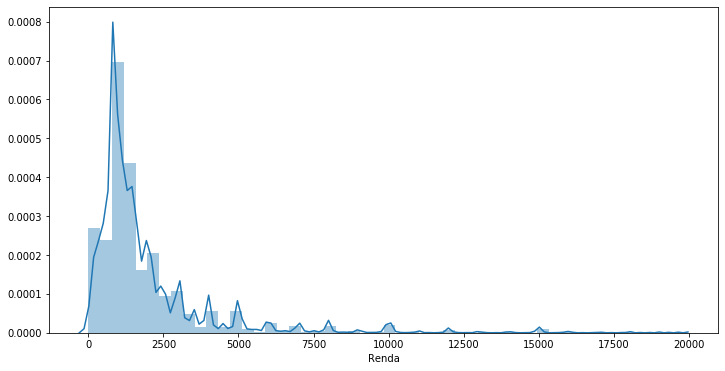

In [180]:
import seaborn as sns
ax = sns.distplot(df.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(12,6)
ax

In [181]:
Moda = df['Renda'].mode()[0]
Moda

788

In [182]:
Mediana = df['Renda'].median()
Mediana

1200.0

In [184]:
Media = df['Renda'].mean()
Media

2000.3831988547631

In [185]:
Moda < Mediana < Media

True

### Avaliando a variável ALTURA

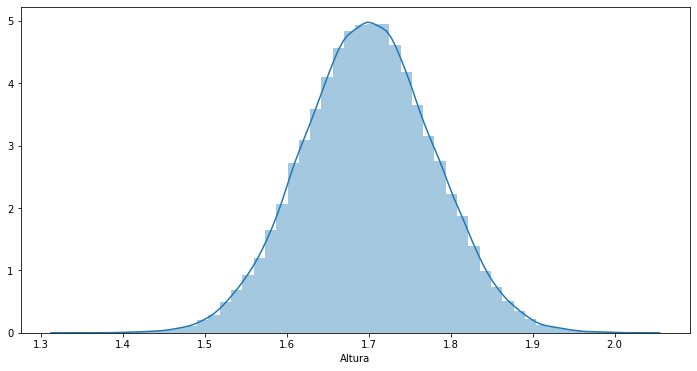

In [186]:
ax = sns.distplot(df['Altura'])
ax.figure.set_size_inches(12,6)
ax

In [192]:
Moda = df['Altura'].mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [188]:
Mediana = df['Altura'].median()
Mediana

1.6993247325

In [189]:
Media = df['Altura'].mean()
Media

1.6995124540575814

### Avaliando a variável ANOS DE ESTUDO

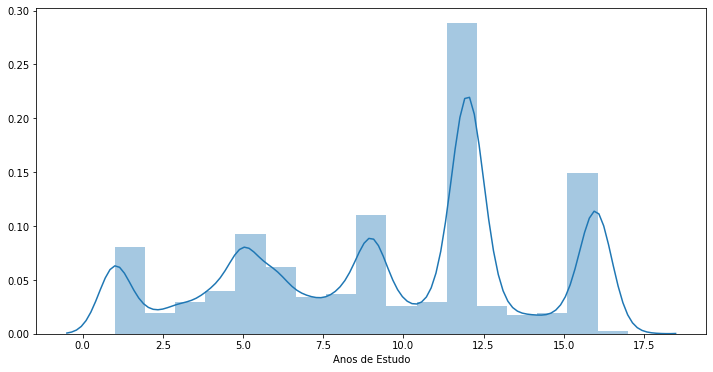

In [195]:
ax = sns.distplot(df['Anos de Estudo'], bins=17)
ax.figure.set_size_inches(12,6)
ax

In [201]:
Moda = df['Anos de Estudo'].mode()[0]
Moda

12

In [202]:
Mediana = df['Anos de Estudo'].median()
Mediana

11.0

In [203]:
Media = df['Anos de Estudo'].mean()
Media

9.469664237376367

In [204]:
Moda > Mediana > Media

True

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$